# Data Driven Analysis of NSF Funding

In [111]:
import os, xml
import numpy as np
from pylab import *

import pandas as pd
import xml.etree.ElementTree as ET
from progressbar import ProgressBar as PB
ion()
_ = np.array

In [181]:
tree = ET.parse('data/1907565.xml')
root = tree.getroot()
for x in root[0]:
    tag = x.tag
    exec('%s = "%s"' % (tag,tag))
    print(x.tag)
    
Year = 'Year'

AwardTitle
AwardEffectiveDate
AwardExpirationDate
AwardTotalIntnAmount
AwardAmount
AwardInstrument
Organization
ProgramOfficer
AbstractNarration
MinAmdLetterDate
MaxAmdLetterDate
ARRAAmount
AwardID
Investigator
Institution
ProgramElement
ProgramReference


In [113]:
cols = [AwardTitle,AwardAmount,AwardEffectiveDate, AwardTotalIntnAmount,
                   AwardInstrument,Organization,ProgramOfficer, ProgramElement, ProgramReference]
df = pd.DataFrame(columns=cols)
df = df.astype({AwardAmount: "float", AwardTotalIntnAmount: "float"})


files = os.listdir("data")
tree = ET.parse('data/1907565.xml')
root = tree.getroot()
vals = {}

bar = PB(max_value=len(files))
errors = 0
for ix, file in enumerate(files):
    bar.update(ix)
    try:
        tree = ET.parse("data/" + file)
    except:
        errors += 1
        continue
    root = tree.getroot()
    vals = {}

    for el in root[0]:
        if el.tag not in cols: continue
        vals[el.tag] = el.text.rstrip()
    
    df = df.append(vals, ignore_index=True)

print("Done with %i errors" % errors)

 99% (48991 of 48993) |################## | Elapsed Time: 0:08:36 ETA:  0:00:00

Done with 3 errors


In [116]:
df = df.astype({AwardAmount: "float", AwardTotalIntnAmount: "float"})
df.sort_values(AwardAmount, inplace=True)

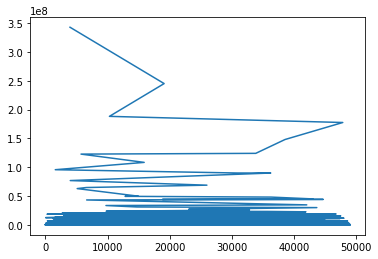

In [117]:
plot(df[AwardAmount])

In [118]:
aa = _(df[AwardAmount])

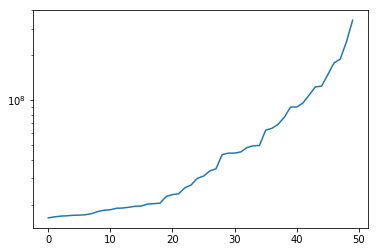

In [119]:
semilogy(aa[-50:])

In [121]:
np.percentile(aa, [50, 75, 90, 99.65])

array([ 269951.        ,  454382.75      ,  750000.        ,
       6141491.55500004])

In [129]:
ad=_(df[AwardEffectiveDate])

In [147]:
ys = np.array(list(map(lambda x: int(x[-4:]), ad)))

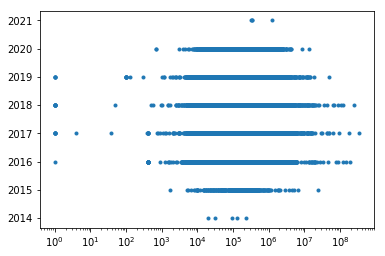

In [151]:
semilogx(aa,ys,'.')

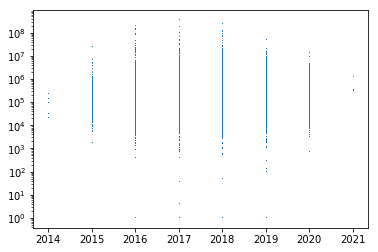

In [158]:
semilogy(ys,aa,',')

In [164]:
df[Year] = ys

In [180]:
df.groupby(Year).quantile(q=.996)

0.996,AwardAmount,AwardTotalIntnAmount
Year,,
2014,222125.368,222125.368
2015,6004016.992,3080061.840
2016,5590890.600,4827988.896
2017,7250551.644,6329397.720
2018,7006751.072,8654645.712
2019,3782344.504,6000000.000
2020,2893948.996,4749864.864
2021,1226419.728,1226419.728
